# <a name="0">Credit-Card-Customer-Segmentation</a>


1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation and visualization</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Modeling</a>

In [ ]:
 import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
#from plotnine import *
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

In [ ]:
df = pd.read_csv("CC GENERAL.csv")

df.head()



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## 2. <a name="2">Data investigation and visualization</a>
(<a href="#0">Go to top</a>)

### Descriptive Statistics of Data

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
cols=list(df.columns[df.dtypes!='object'])


In [ ]:
print(len(cols))

17


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


## Handing missing values

In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [ ]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].median()
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [ ]:
df.drop(['CUST_ID'],axis=1,inplace=True)

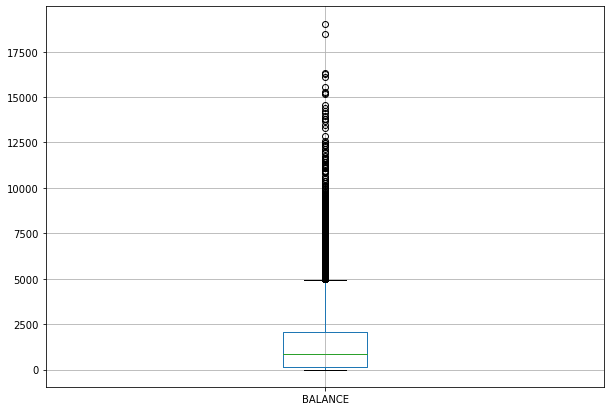

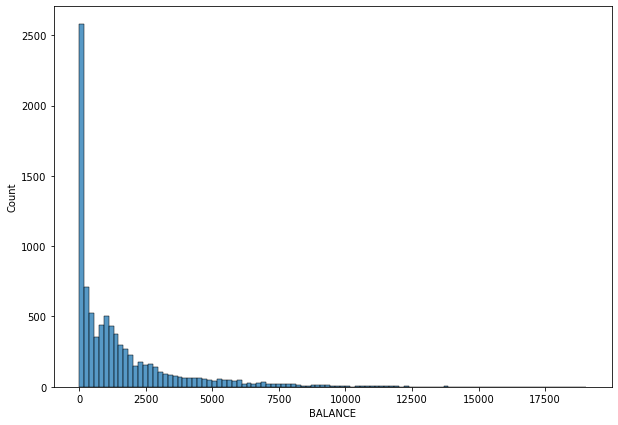

<Figure size 720x504 with 0 Axes>

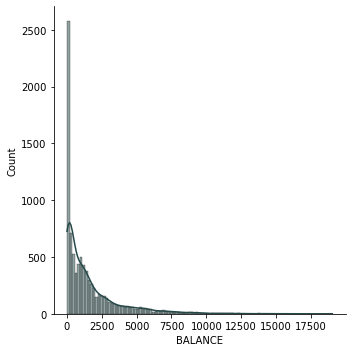

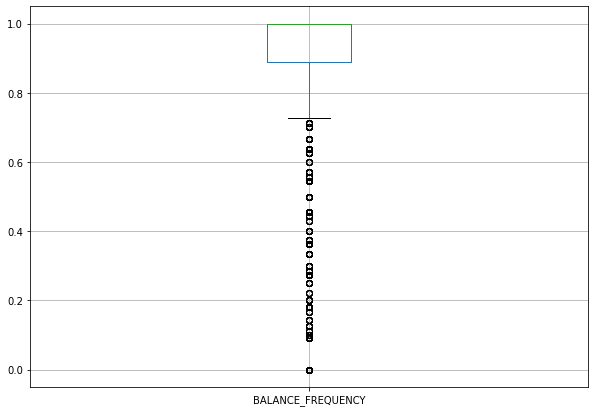

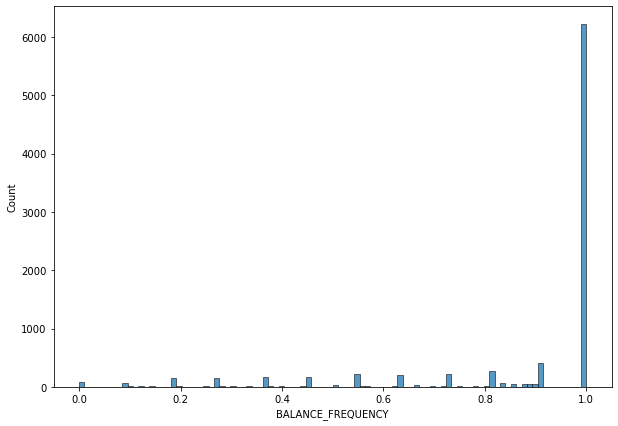

<Figure size 720x504 with 0 Axes>

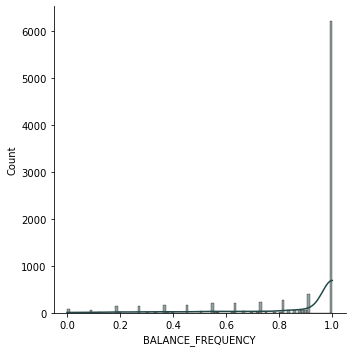

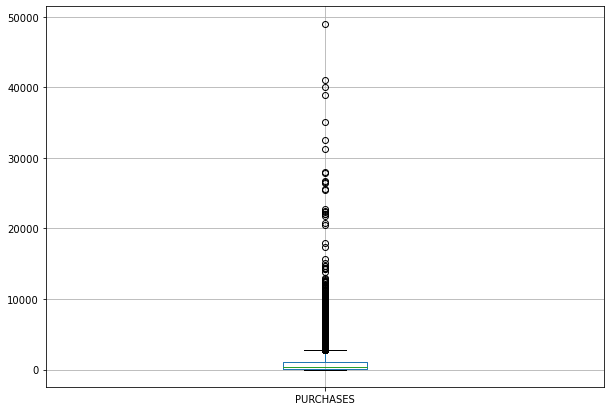

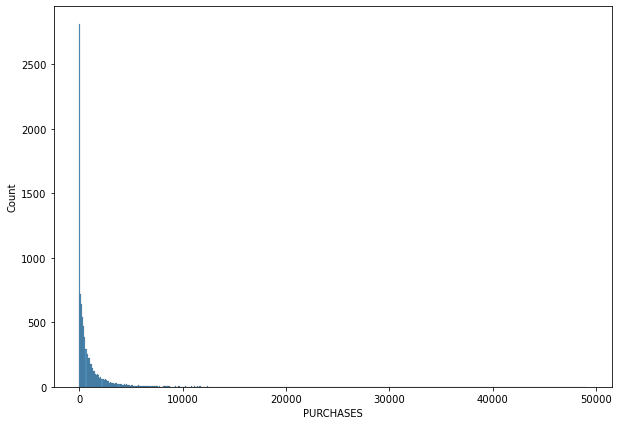

<Figure size 720x504 with 0 Axes>

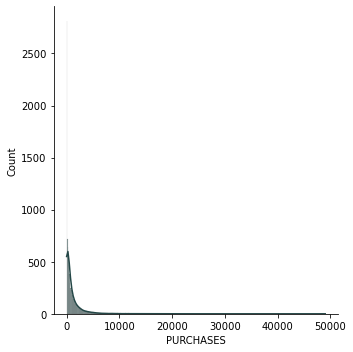

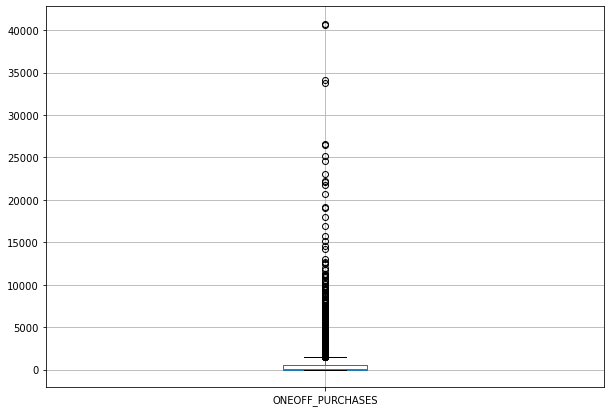

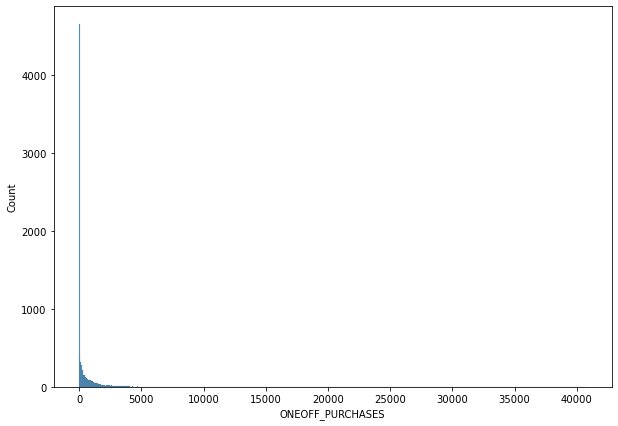

<Figure size 720x504 with 0 Axes>

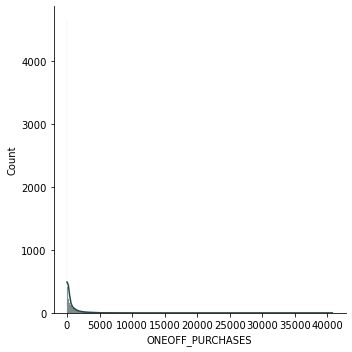

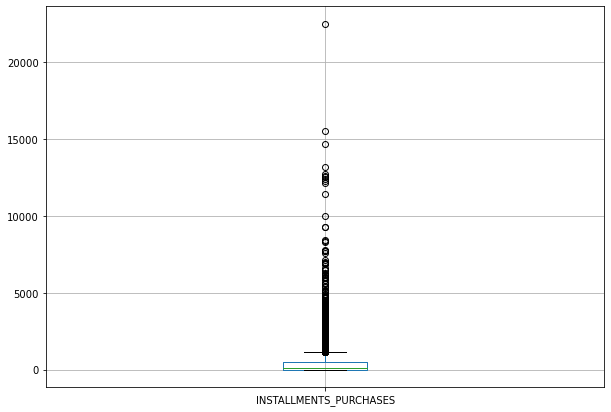

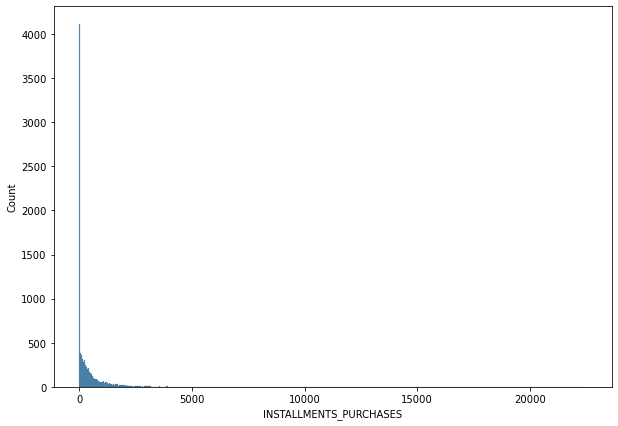

<Figure size 720x504 with 0 Axes>

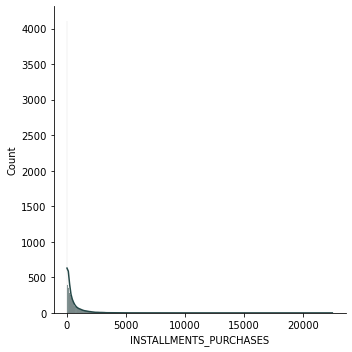

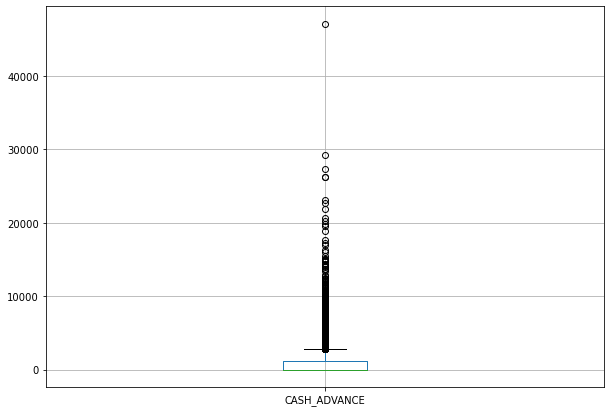

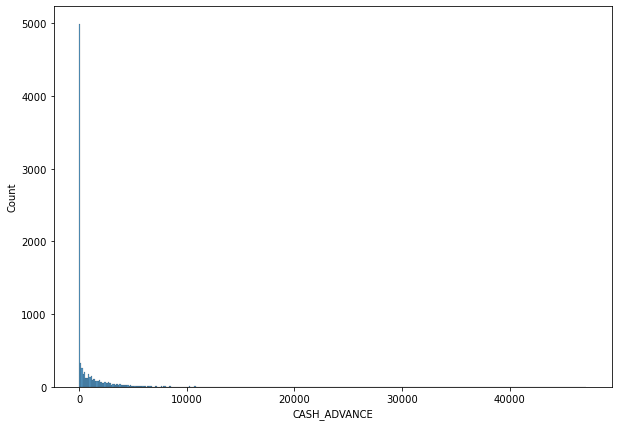

<Figure size 720x504 with 0 Axes>

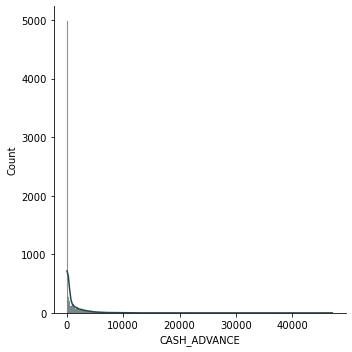

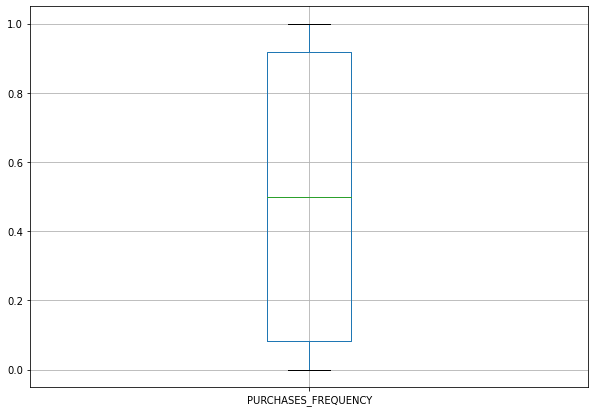

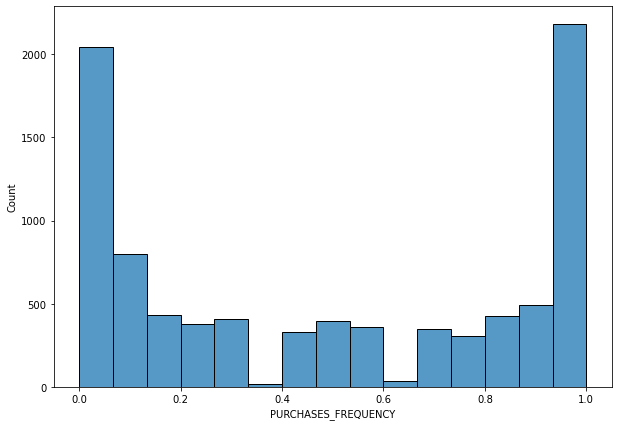

<Figure size 720x504 with 0 Axes>

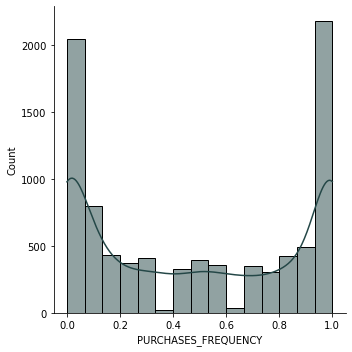

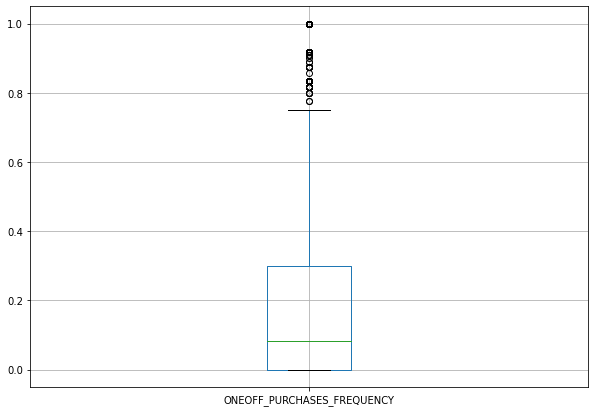

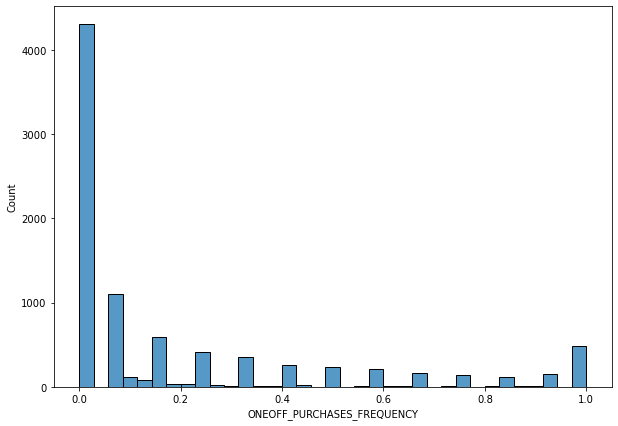

<Figure size 720x504 with 0 Axes>

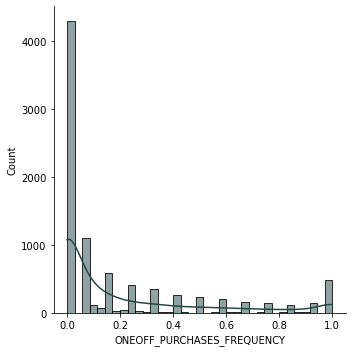

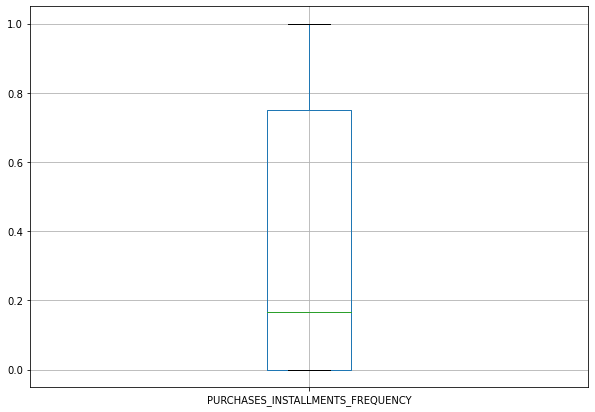

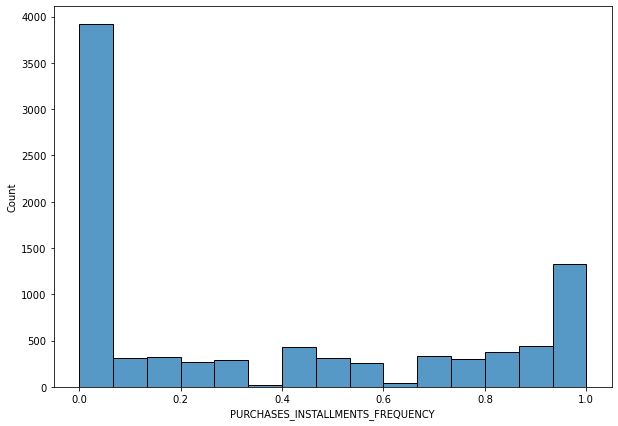

<Figure size 720x504 with 0 Axes>

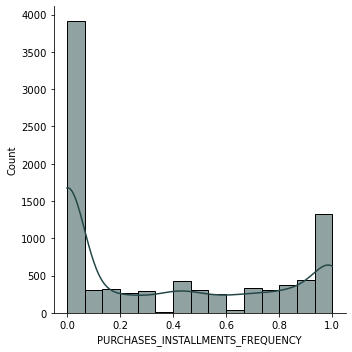

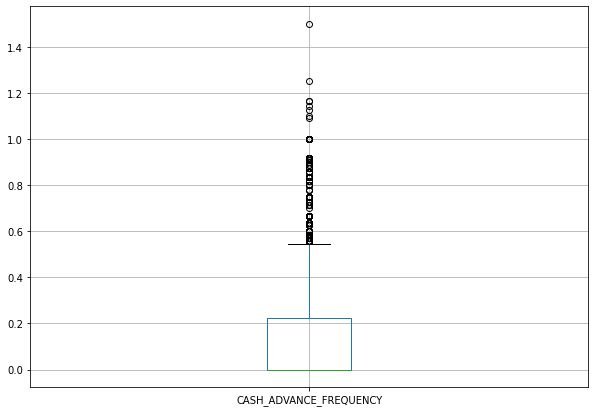

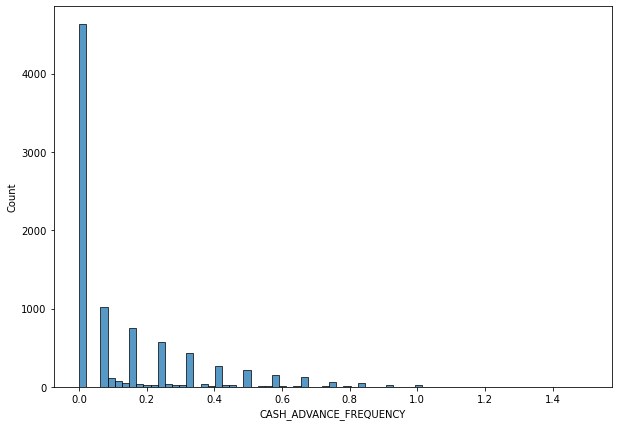

<Figure size 720x504 with 0 Axes>

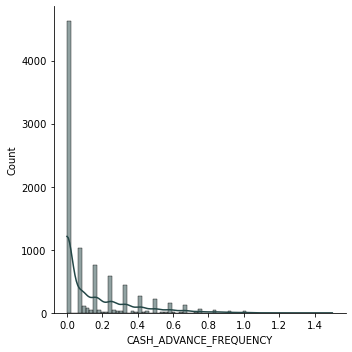

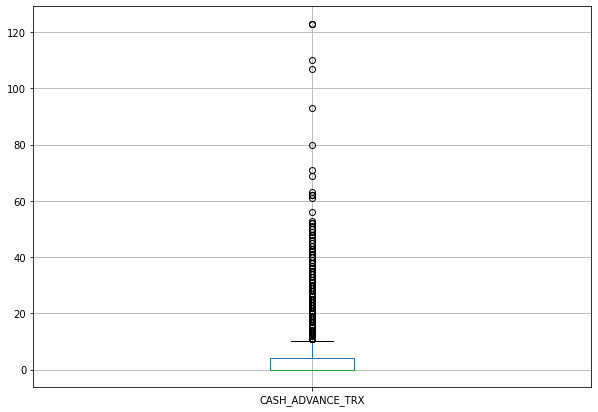

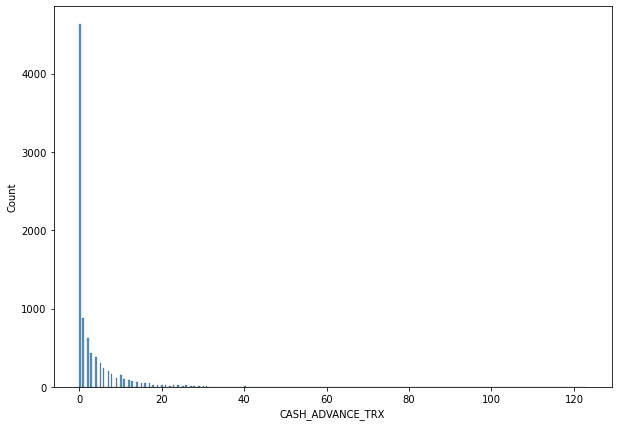

<Figure size 720x504 with 0 Axes>

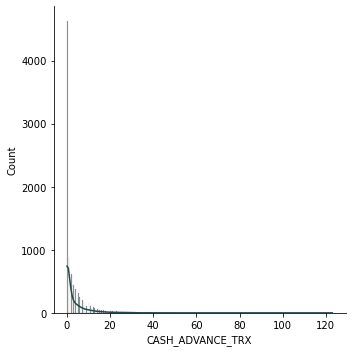

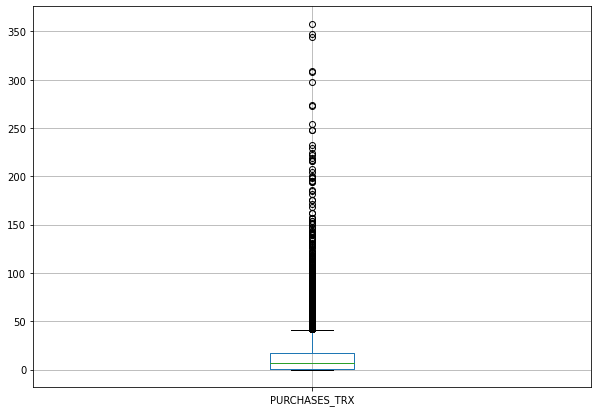

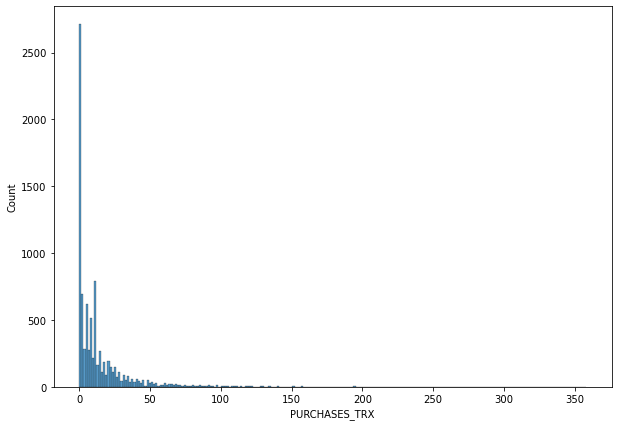

<Figure size 720x504 with 0 Axes>

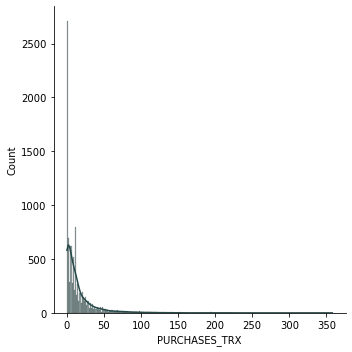

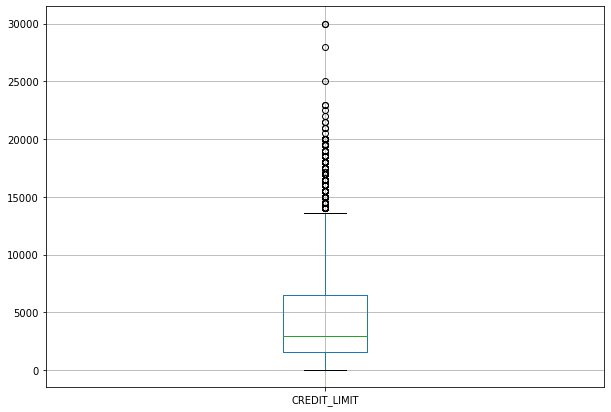

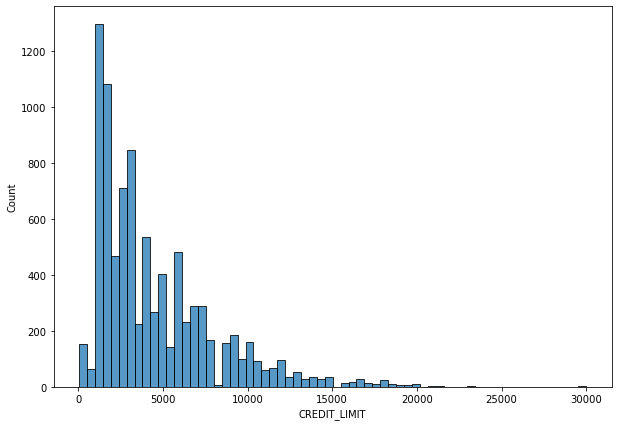

<Figure size 720x504 with 0 Axes>

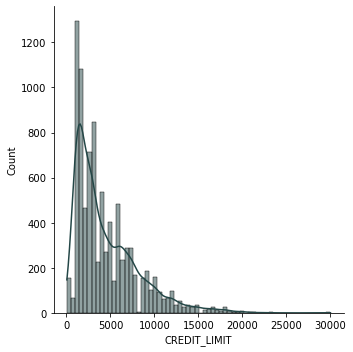

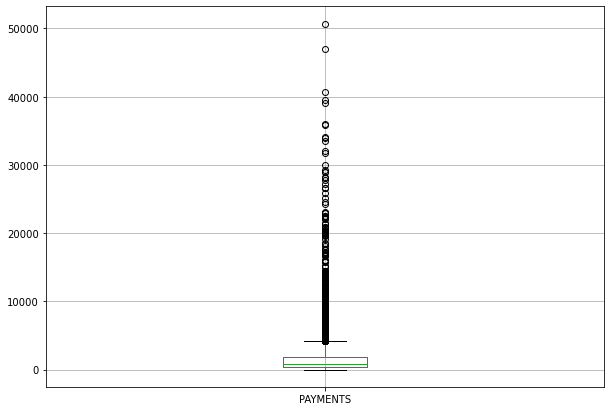

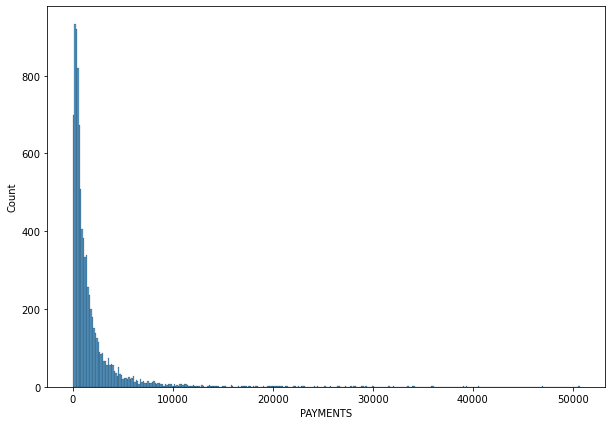

<Figure size 720x504 with 0 Axes>

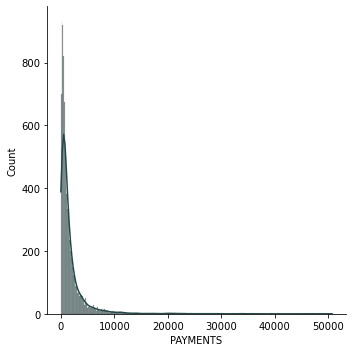

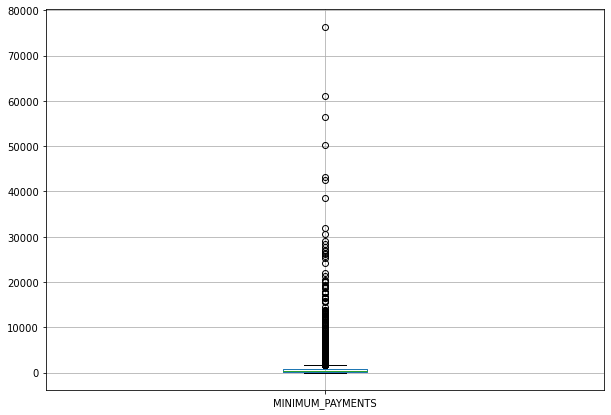

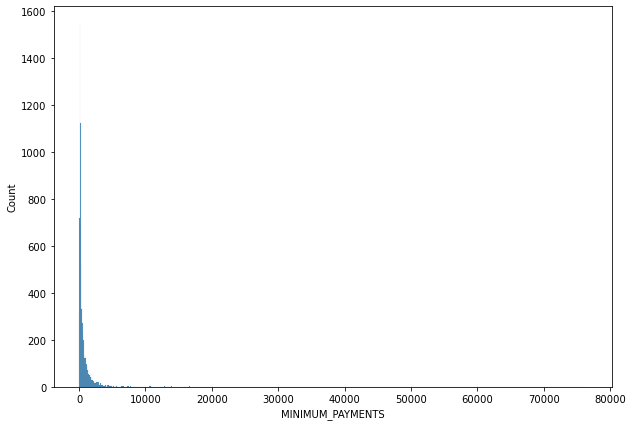

<Figure size 720x504 with 0 Axes>

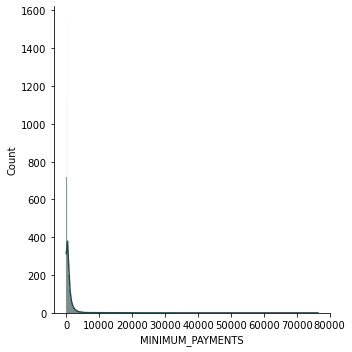

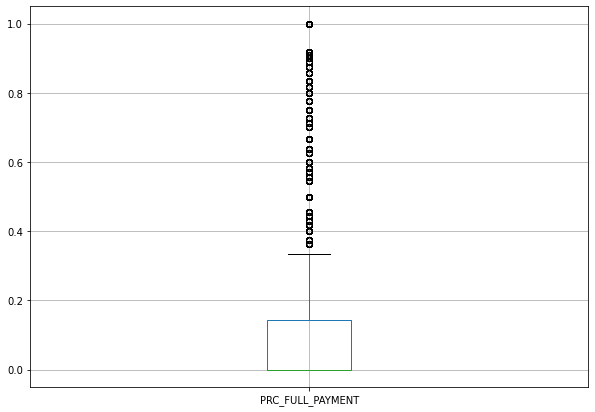

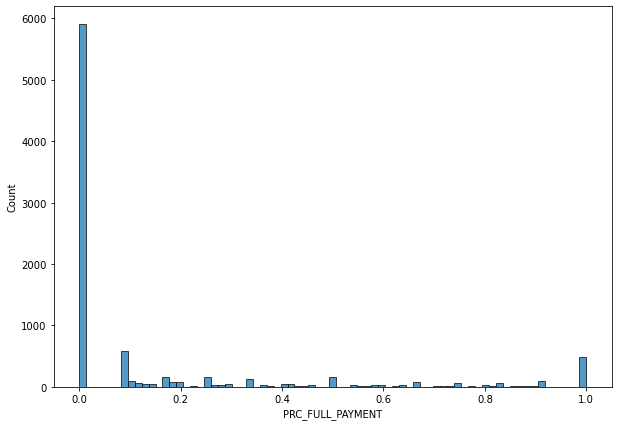

<Figure size 720x504 with 0 Axes>

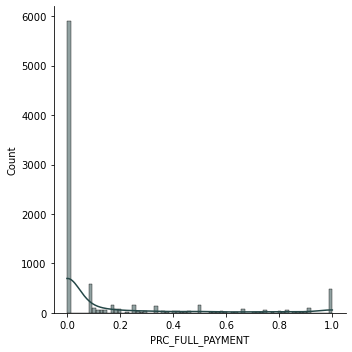

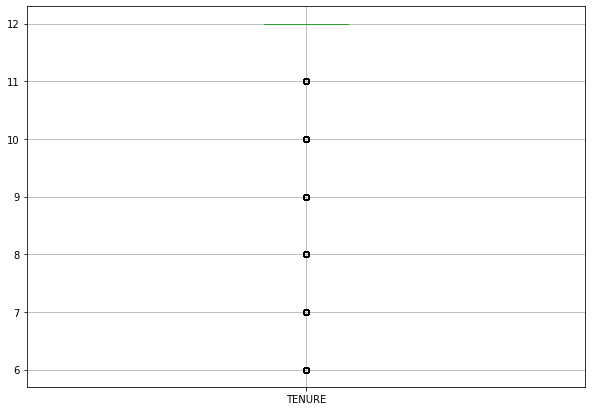

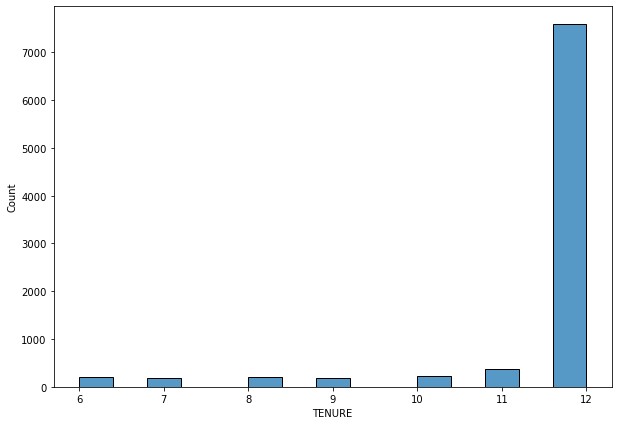

<Figure size 720x504 with 0 Axes>

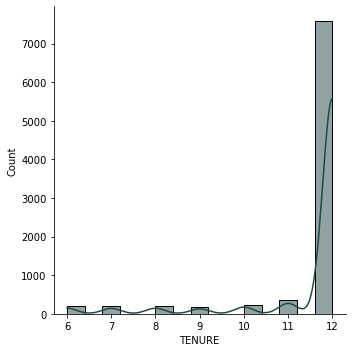

In [ ]:
#  plt.subplot(17,3,i)
for col in cols:
    plt.figure(figsize=(10,7))
    df.boxplot(column=col)
    plt.show()
    #visualizing house prices
    plt.figure(figsize=(10,7))
    sns.histplot(df[col])
    plt.show()
    # looking at the distribution of data
    plt.figure(figsize=(10,7))
    sns.displot(x=col, data=df, kde=True, color='#244747')
    plt.show()

In [ ]:
log_cols=['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']


# Log transformation

In [ ]:
# for col in log_cols:
#     df[col] = np.log(1 + df[col])

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.999569,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.906149,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(df[cols])

#df[cols]= RobustScaler().transform(df[cols])

In [ ]:
df[cols]=X_train_scaled

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,0.358756,-1.103850,0.599631,0.959631,0.687322,0.878882,-0.011514,0.397158,0.263748,0.608134,0.812270,0.481967,0.304990,0.577257,0.862117,1.076124,-0.482065
std,1.080777,2.131185,1.996252,2.872763,1.929752,1.882865,0.481631,0.994484,0.529935,0.900596,1.706247,1.553659,0.742615,1.907230,3.775870,2.047579,1.337134
min,-0.453623,-9.000009,-0.337724,-0.065763,-0.189907,0.000000,-0.600000,-0.277777,-0.222223,0.000000,0.000000,-0.437500,-0.602041,-0.564601,-0.505506,0.000000,-6.000000
25%,-0.386974,-1.000000,-0.300541,-0.065763,-0.189907,0.000000,-0.500000,-0.277777,-0.222223,0.000000,0.000000,-0.375000,-0.285714,-0.312109,-0.228970,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.613026,0.000000,0.699459,0.934237,0.810093,1.000000,0.500000,0.722223,0.777777,1.000000,1.000000,0.625000,0.714286,0.687891,0.771030,1.000000,0.000000
max,9.433744,0.000000,45.477807,70.476178,47.820335,42.318465,0.600000,3.055557,1.111111,6.750007,30.750000,21.937500,5.510204,32.848838,123.159920,7.000007,0.000000


In [ ]:
# scale = StandardScaler()
# df = scale.fit_transform(df)
# df.shape

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler()
# df = scale.fit_transform(df)

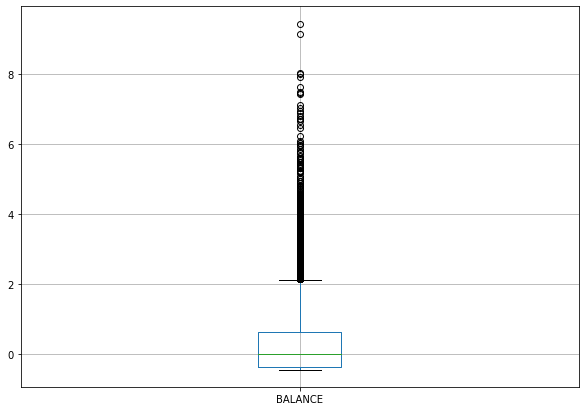

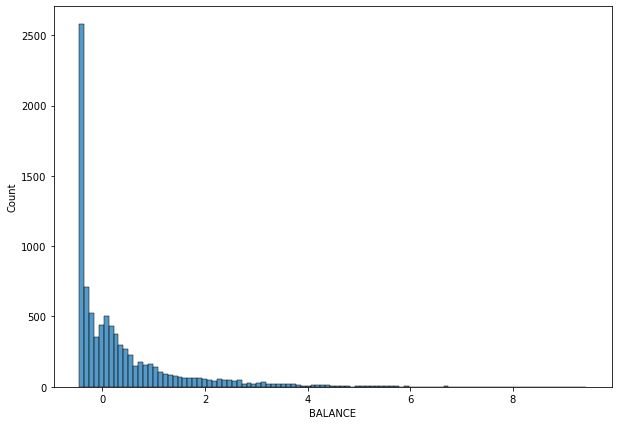

<Figure size 720x504 with 0 Axes>

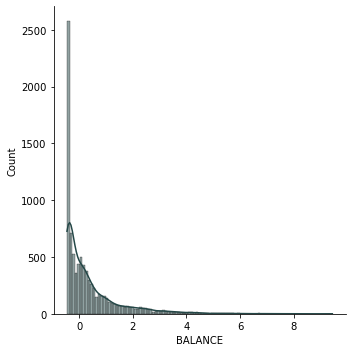

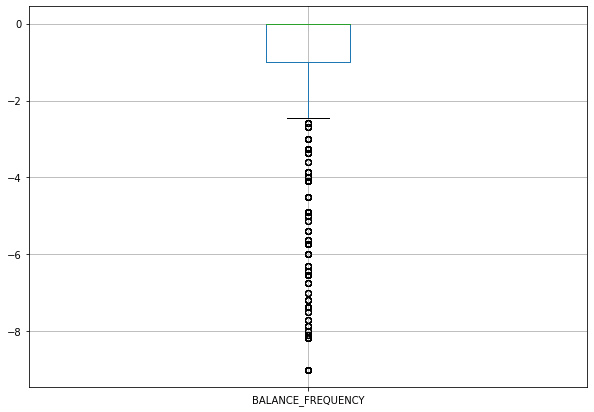

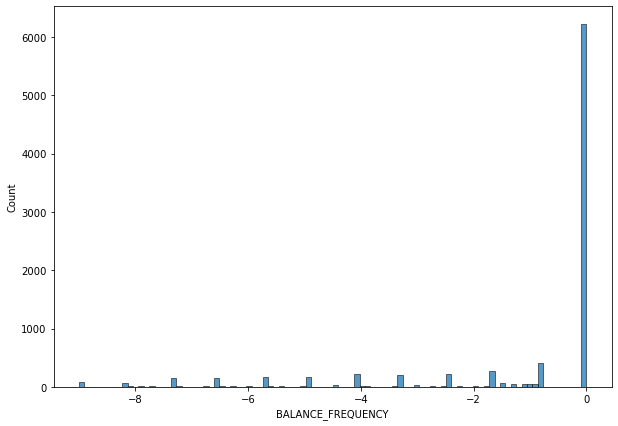

<Figure size 720x504 with 0 Axes>

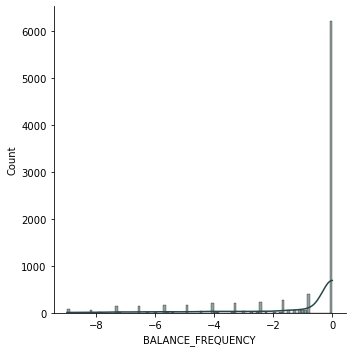

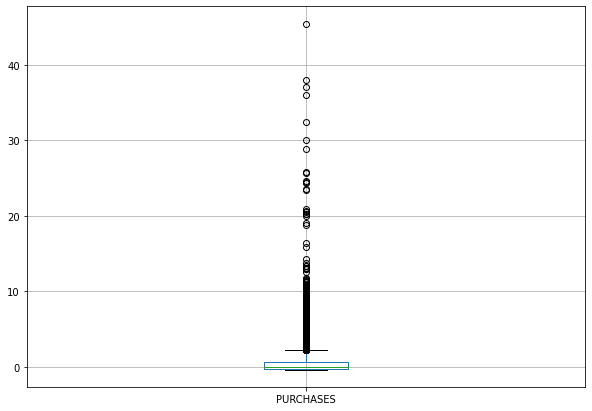

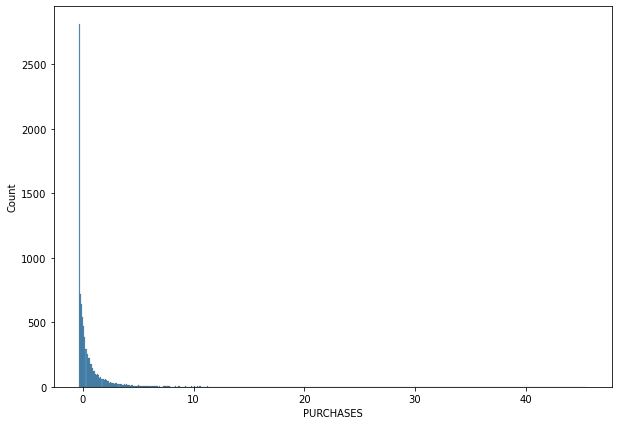

<Figure size 720x504 with 0 Axes>

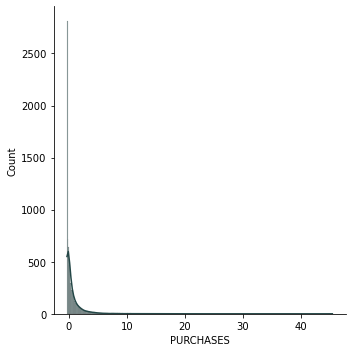

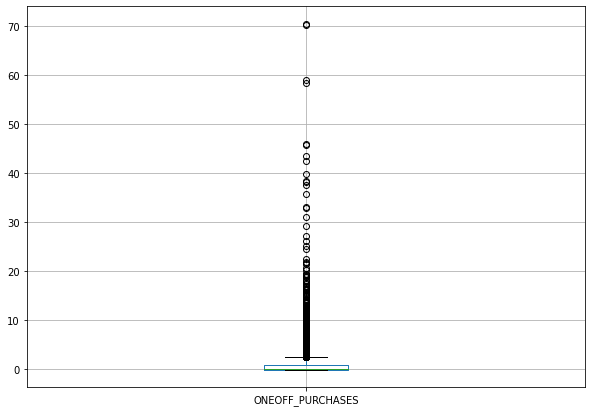

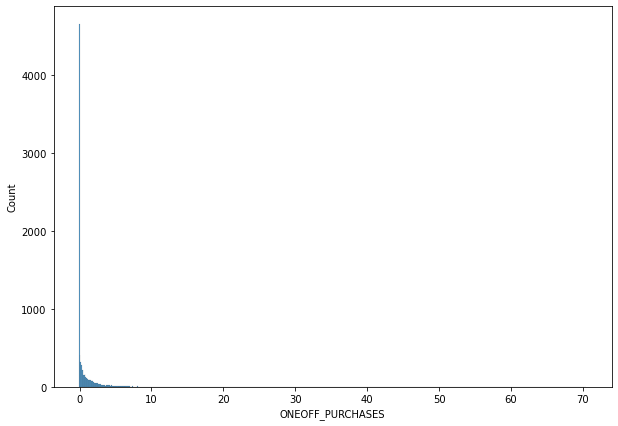

<Figure size 720x504 with 0 Axes>

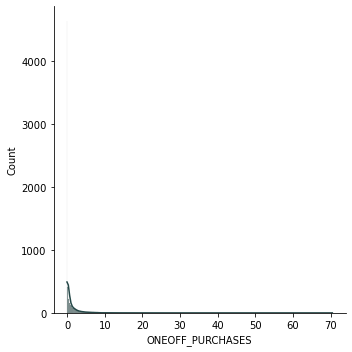

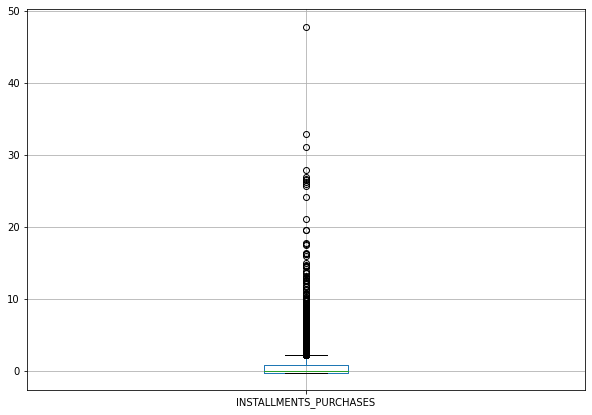

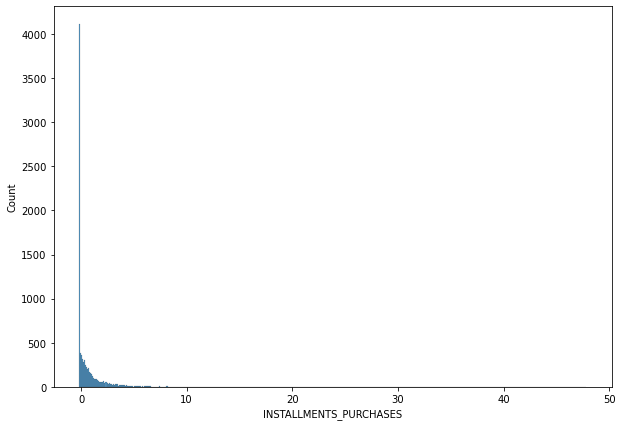

<Figure size 720x504 with 0 Axes>

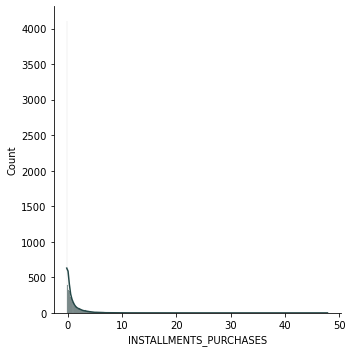

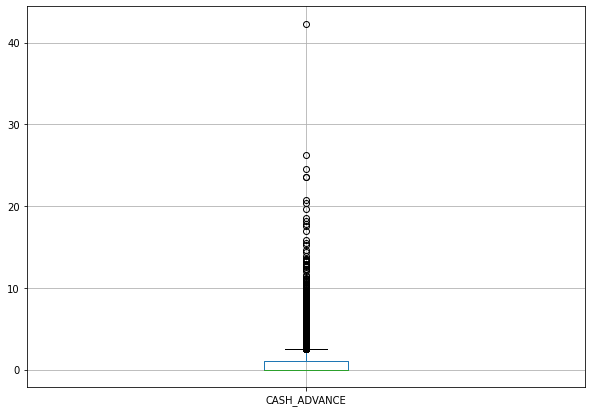

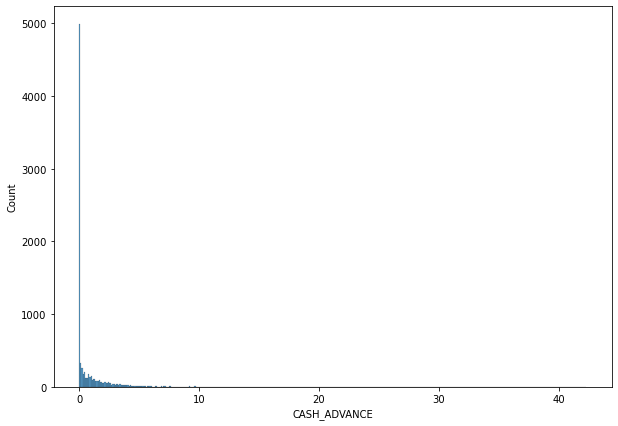

<Figure size 720x504 with 0 Axes>

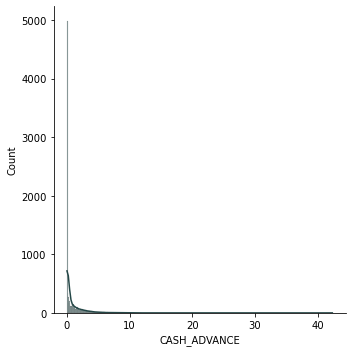

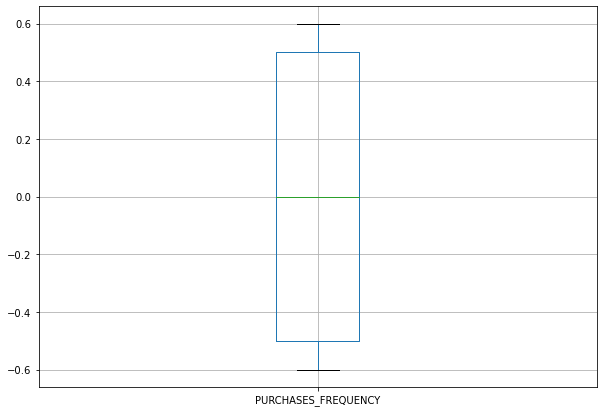

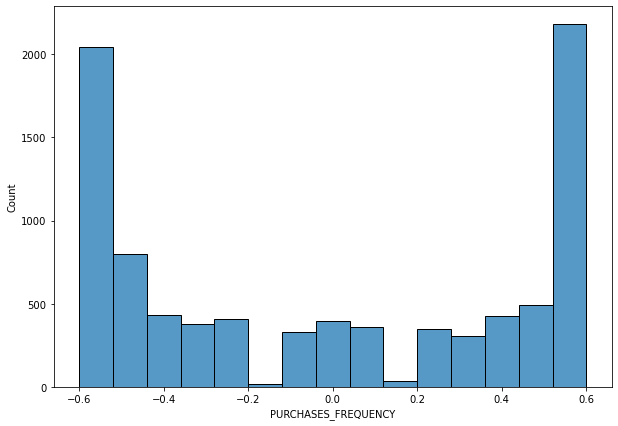

<Figure size 720x504 with 0 Axes>

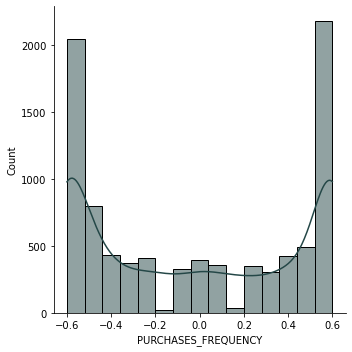

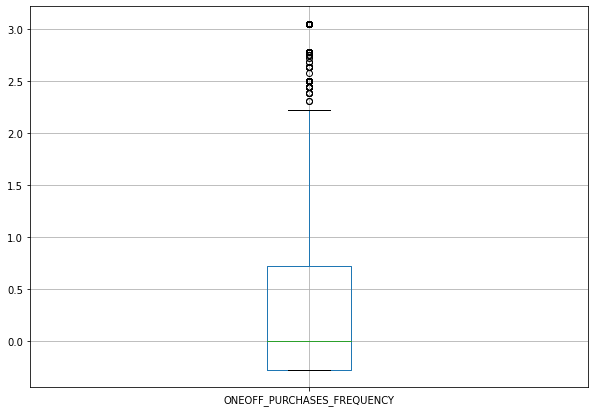

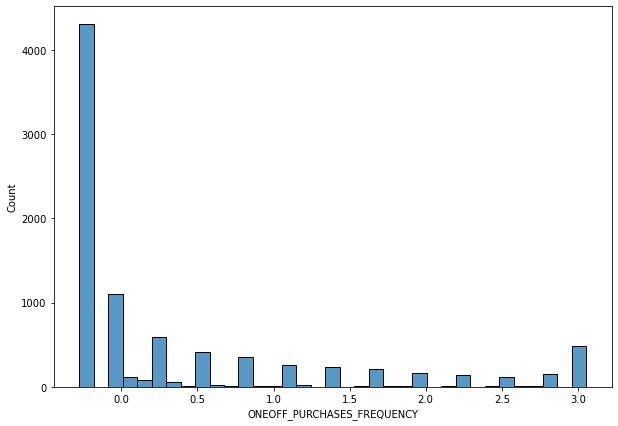

<Figure size 720x504 with 0 Axes>

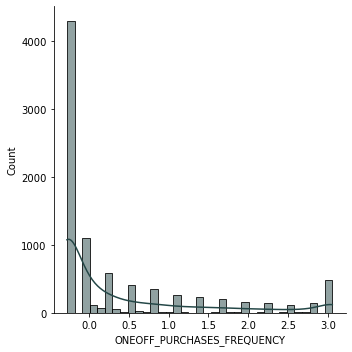

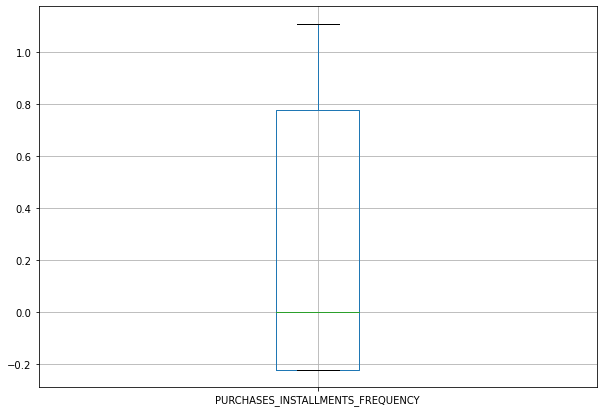

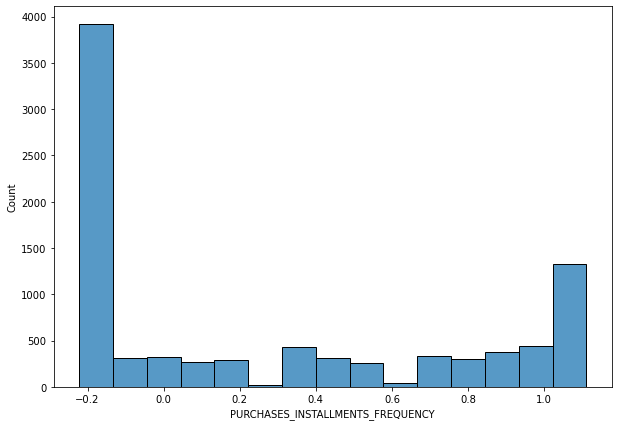

<Figure size 720x504 with 0 Axes>

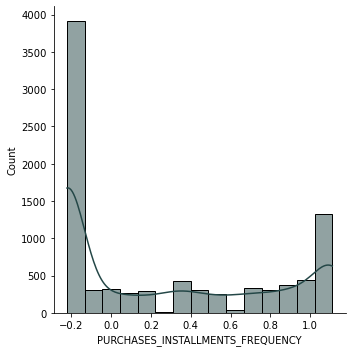

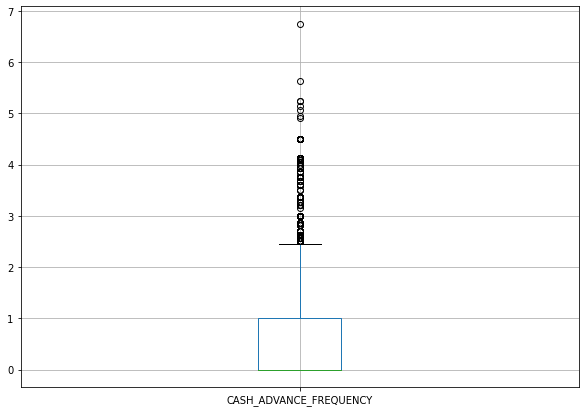

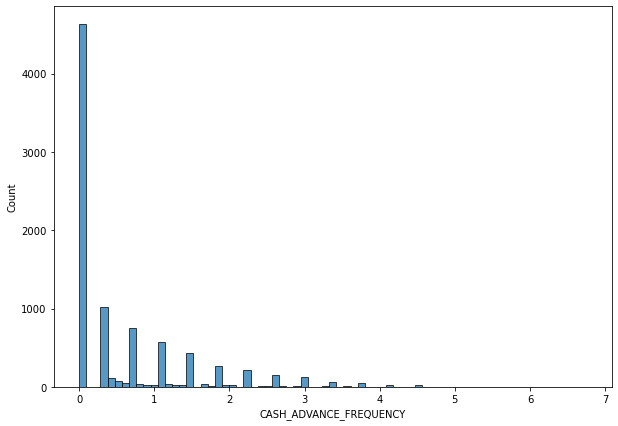

<Figure size 720x504 with 0 Axes>

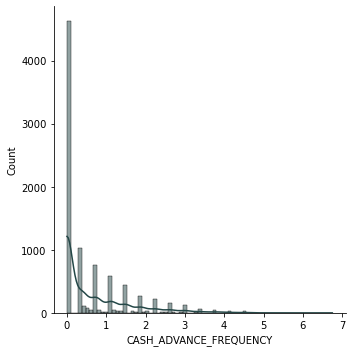

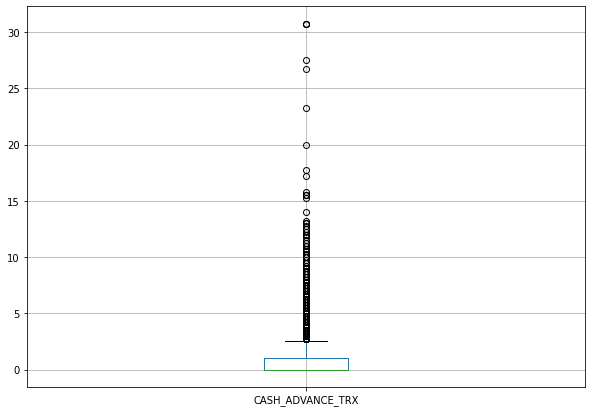

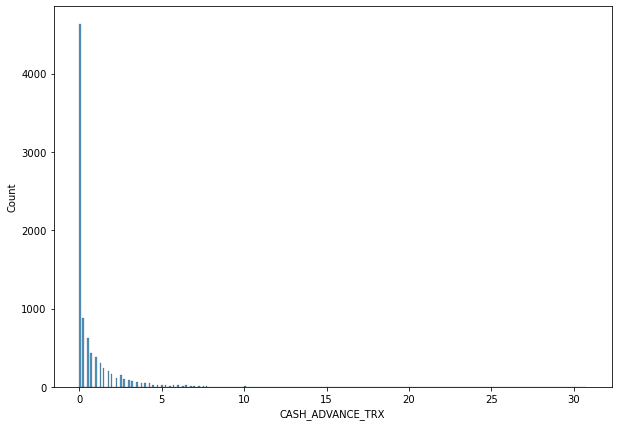

<Figure size 720x504 with 0 Axes>

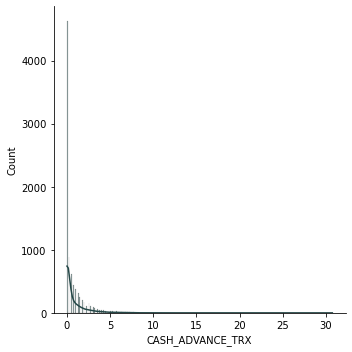

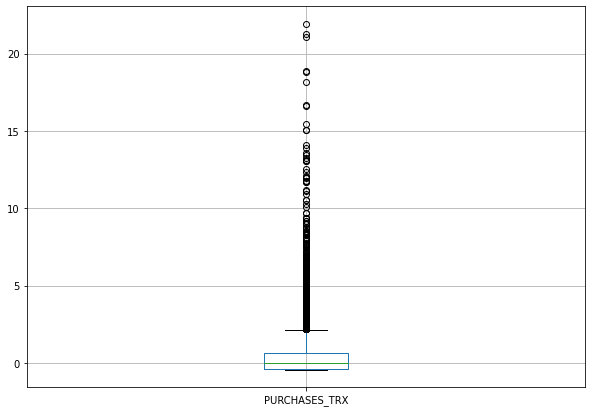

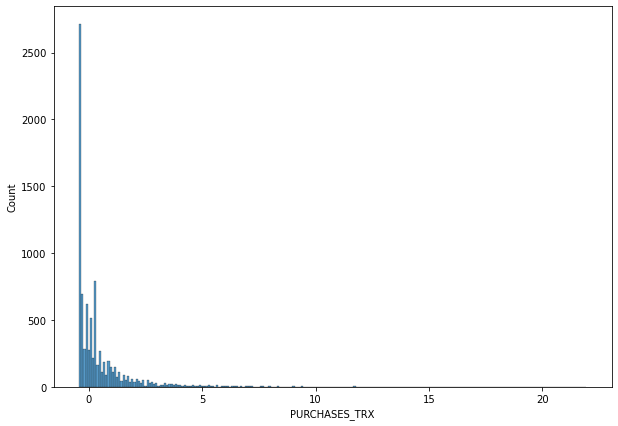

<Figure size 720x504 with 0 Axes>

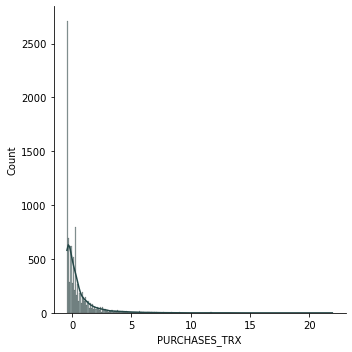

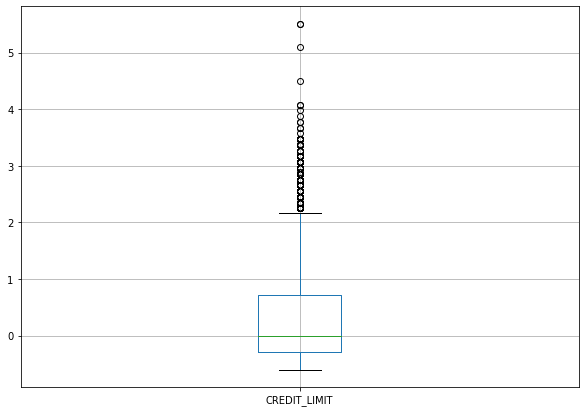

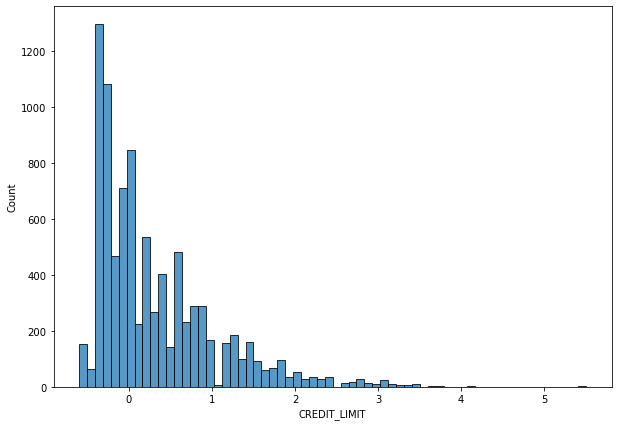

<Figure size 720x504 with 0 Axes>

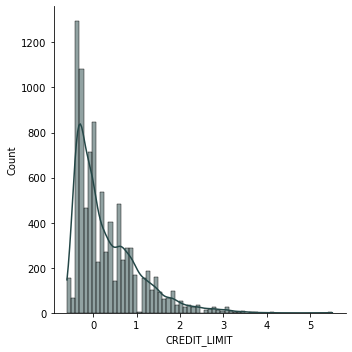

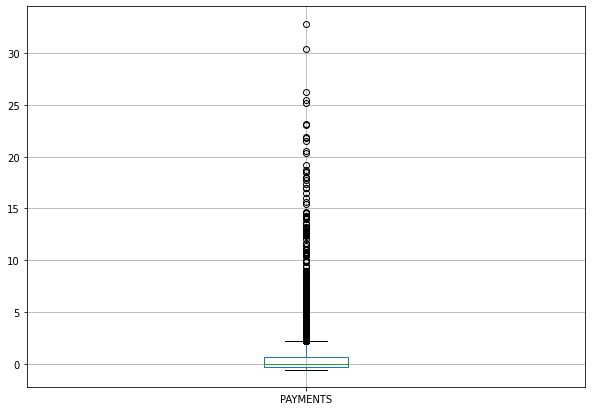

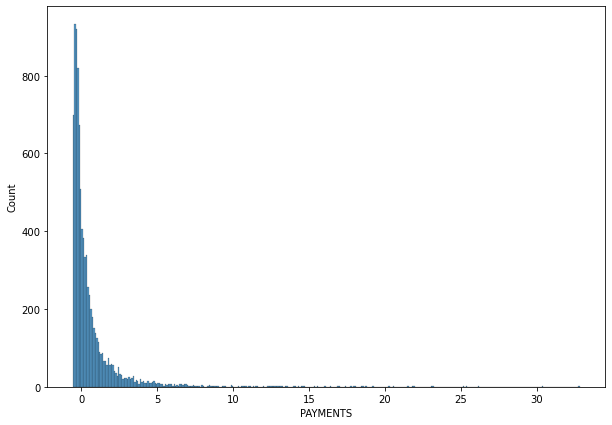

<Figure size 720x504 with 0 Axes>

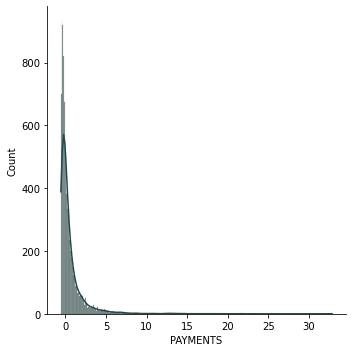

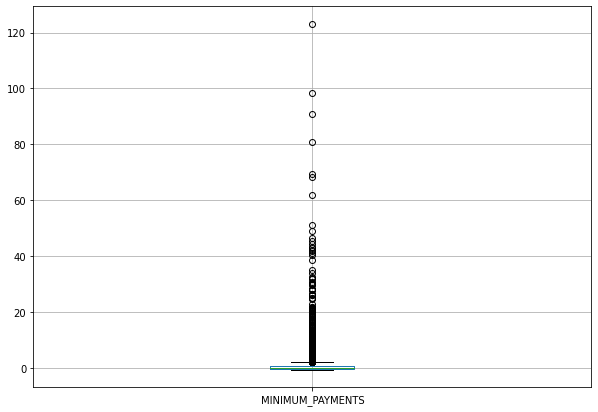

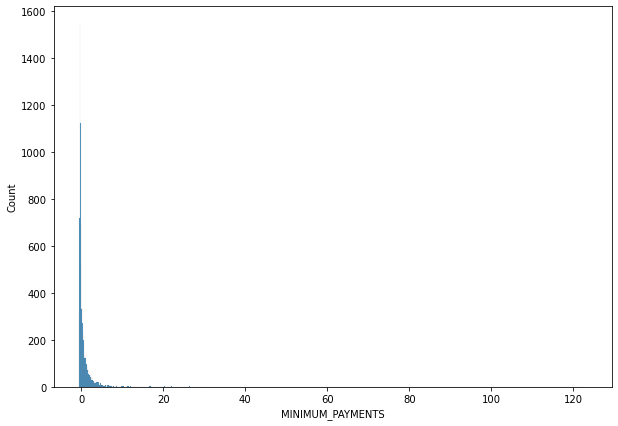

<Figure size 720x504 with 0 Axes>

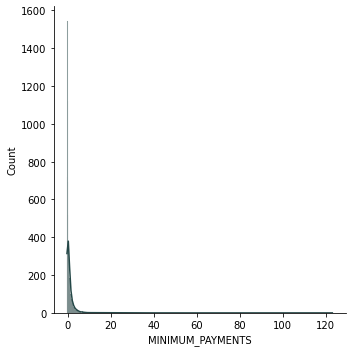

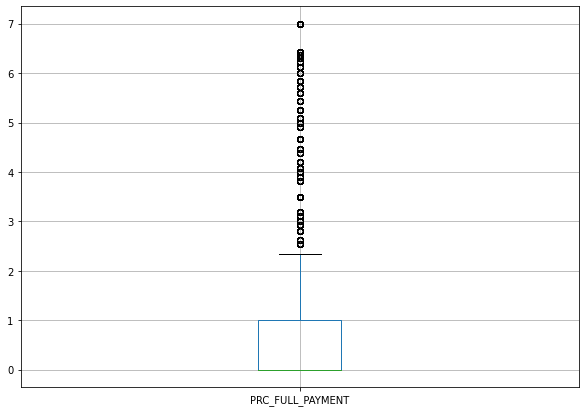

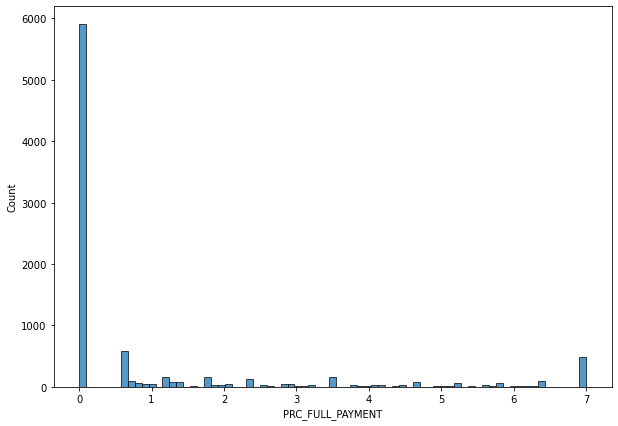

<Figure size 720x504 with 0 Axes>

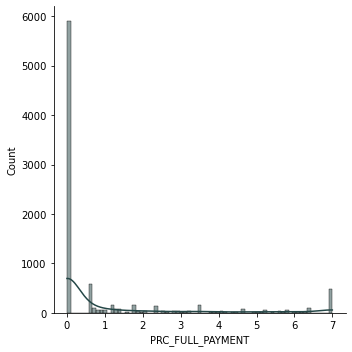

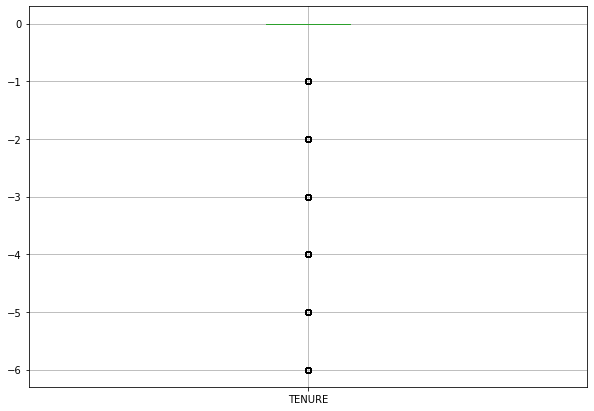

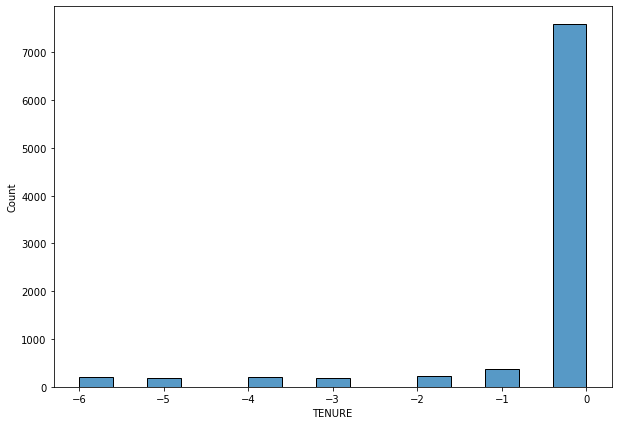

<Figure size 720x504 with 0 Axes>

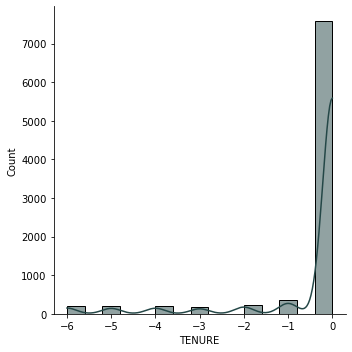

In [ ]:
for col in cols:
    plt.figure(figsize=(10,7))
    df.boxplot(column=col)
    plt.show()
    #visualizing house prices
    plt.figure(figsize=(10,7))
    sns.histplot(df[col])
    plt.show()
    # looking at the distribution of data
    plt.figure(figsize=(10,7))
    sns.displot(x=col, data=df, kde=True, color='#244747')
    plt.show()

### Interpretation of Clusters

## Visualization of Clusters

#### Using PCA to transform data to 2 dimensions for visualization

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df.shape

(8949, 17)

In [ ]:
#dist = 1 - cosine_similarity(df)

pca = PCA(0.95)
pca.fit(df)
X_PCA = pca.transform(df)
X_PCA.shape

(8949, 9)

In [ ]:
df=X_PCA

In [ ]:
def choose_for_K_means(n,df):
  distortions=[]
  for k in range(1,n+1):
    km = KMeans(k)
    km.fit(df)
    distortions.append(km.inertia_)
  ks=[i for i in range(1,n+1)]
  plt.plot(ks, distortions,'-o')
  plt.show()
  




In [ ]:
def choose_for_hac(df):
 plt.figure(figsize=(50, 20))
 plt.title("Counters Dendograms")
 dend = shc.dendrogram(shc.linkage(y=df , method='single',metric='euclidean'),orientation='top')
plt.show()

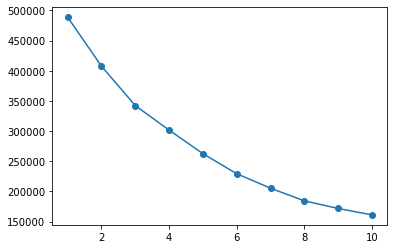

In [ ]:
choose_for_K_means(10,df)

In [ ]:
#choose_for_hac(df)

## 4. <a name="4">Modeling</a>
(<a href="#0">Go to top</a>)

In [ ]:

km = KMeans(n_clusters=2, random_state=42)
hac = AgglomerativeClustering(2)
db = DBSCAN(eps = 30, min_samples = 2)
gm = GaussianMixture(2)


km.fit(df)
hac.fit(df)
db.fit(df)
gm.fit(df)

labels = gm.predict(df)

print('Silhoutte score of  model K-means is ' + str(silhouette_score(df, km.labels_)*100))
print('Silhoutte score of  model Agglomerative is ' + str(silhouette_score(df, hac.labels_)*100))
print('Silhoutte score of  model DBSCAN is ' + str(silhouette_score(df, db.labels_)*100))
print('Silhoutte score of  model GMM is ' + str(silhouette_score(df, gm.predict(df))*100))


Silhoutte score of  model K-means is 67.34726508393639
Silhoutte score of  model Agglomerative is 70.74524274267424
Silhoutte score of  model DBSCAN is 93.5698520179901
Silhoutte score of  model GMM is 29.80436552146703


# the best algorithm with this Data is DBSCAN that spilts the data into two clusters with silhouette_score = 93.5698520179901" using PCA

## KMeans Model
## the highest value is 0.6287 with K=2 and using PCA

With PCA = 95% variance of the data 
silhouette_score with different Ks is:

 Accuracy for n_classes = 2 : 0.6287395196117747

 Accuracy for n_classes = 3 : 0.5891490152276136

 Accuracy for n_classes = 4 : 0.4322462422581888

 Accuracy for n_classes = 5 : 0.31882167470980266



the highest value is 0.6287 with K=2 and using PCA


## AgglomerativeClustering Model
## the highest value is 0.66 with K=2 and using PCA

With PCA silhouette_score with different Ks is:

 Accuracy for n_classes = 2 : 0.6600907017471124

 Accuracy for n_classes = 3 : 0.6538212875018898

 Accuracy for n_classes = 4 : 0.36381140421512254


the highest value is 0.66 with K=2 and using PCA


## DBSCAN
## the best result is with eps=17  samples=2 with stnderdization = 0.8852306320380335 two classes and noise using PCA

with eps=5  samples=2 with stnderdization = 0.4588688942157637


with eps=9  samples=3 with stnderdization = 0.8328396812068974 


with eps=20  samples=4 with stnderdization = 93.5698520179901 into two classes


## GaussianMixture
## the highest value is 0.3089 with K=2 and using PCA

With PCA silhouette_score with different Ks is:

 Accuracy for n_classes = 2 : 0.3088794356765755

 Accuracy for n_classes = 3 : 0.11685301469402391

 Accuracy for n_classes = 4 : 0.08621026624952152


the highest value is 0.3089 with K=2 and using PCA
